In [ ]:
Using ridge regression to overcome linear regression's shortfalls

In [4]:
#Need lr from previous recipe
from sklearn import datasets
boston = datasets.load_boston()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(boston.data, boston.target)


from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=2000,n_features=3, effective_rank=2, noise=10)

import numpy as np
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.5*len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data),size=subsample_size)
 
coefs = np.ones((n_bootstraps, 3))
for i in range(n_bootstraps):
     subsample_idx = subsample()
     subsample_X = reg_data[subsample_idx]
     subsample_y = reg_target[subsample_idx]
     lr.fit(subsample_X, subsample_y)
     coefs[i][0] = lr.coef_[0]
     coefs[i][1] = lr.coef_[1]
     coefs[i][2] = lr.coef_[2]

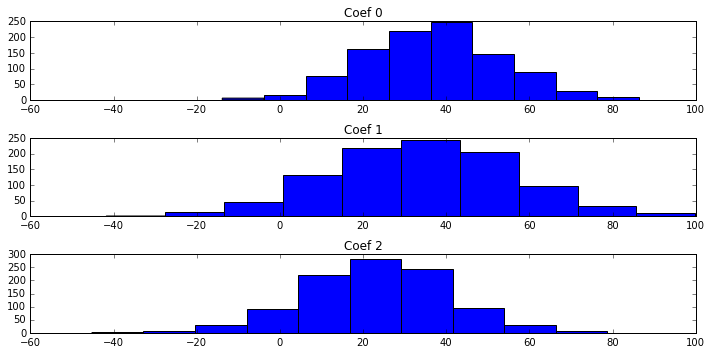

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
 
ax1 = plt.subplot(311, title ='Coef 0')
ax1.hist(coefs[:,0])
 
ax2 = plt.subplot(312,sharex=ax1, title ='Coef 1')
ax2.hist(coefs[:,1])
 
ax3 = plt.subplot(313,sharex=ax1, title ='Coef 2')
ax3.hist(coefs[:,2])
plt.tight_layout()

In [2]:
from sklearn.linear_model import Ridge
r = Ridge()
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.5*len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data),size=subsample_size)

coefs_r = np.ones((n_bootstraps, 3))
for i in range(n_bootstraps):
     subsample_idx = subsample()
     subsample_X = reg_data[subsample_idx]
     subsample_y = reg_target[subsample_idx]
     r.fit(subsample_X, subsample_y)
     coefs_r[i][0] = r.coef_[0]
     coefs_r[i][1] = r.coef_[1]
     coefs_r[i][2] = r.coef_[2]

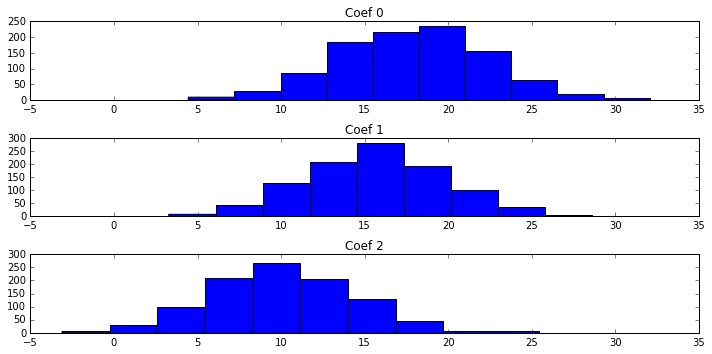

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
 
ax1 = plt.subplot(311, title ='Coef 0')
ax1.hist(coefs_r[:,0])
 
ax2 = plt.subplot(312,sharex=ax1, title ='Coef 1')
ax2.hist(coefs_r[:,1])
 
ax3 = plt.subplot(313,sharex=ax1, title ='Coef 2')
ax3.hist(coefs_r[:,2])
plt.tight_layout()

In [8]:
np.var(coefs, axis=0)

array([ 264.2537415 ,  488.659325  ,  286.19314315])

In [9]:
np.var(coefs_r, axis=0) 

array([ 19.62226776,  16.92848366,  18.44619886])